# Modulo 5: Evaluacion
## Alumno: Jose Suarez

### Ejercicio 1
Cierta compañía aérea ha requerido de sus servicios profesionales para llevar a cabo un estudio relacionado con la cantidad de pasajeros que llegan al país en vuelos internacionales, dicho estudio tiene relación con la enfermedad de COVID-19. De acuerdo a la información que maneja la compañía, la cantidad de pasajeros que llegan en vuelos internacionales se comporta aproximadamente normal con una media de 120 pasajeros y una varianza de 25.
#### 1.a) Asumiendo que cada día llegan a Santiago 16 vuelos internacionales, determine la probabilidad que durante el año (52 semanas) la cantidad total de pasajeros sea de al menos de 699500.

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm, binom,geom,t,ttest_1samp
# dist normal pasajeros por vuelo
mu_pasajerosxVuelo = 120
sigma_pasajerosxVuelo = 25

vuelosxDia = 16
diasxAño = 52 * 7
vuelosxAño = vuelosxDia * diasxAño

cotaInfPasajeros = 699500

mu_pasajerosxAño = mu_pasajerosxVuelo * vuelosxAño
sigma_pasajerosxAño = sigma_pasajerosxVuelo * (vuelosxAño ** 0.5 )

prob_mas699500 = np.round(1 - norm.cdf(cotaInfPasajeros, loc = mu_pasajerosxAño, scale = sigma_pasajerosxAño), 4) * 100

print(f"1.a) La probabilidad que durante el año el total de pasajeros sea de almenos 699500 personas es de {prob_mas699500}%")


1.a) La probabilidad que durante el año el total de pasajeros sea de almenos 699500 personas es de 37.26%


#### b. De acuerdo con registros históricos se sabe que aproximadamente un 7% de los pasajeros son niños. Considerando un potencial de 400 pasajeros que llegarían en los próximos días, determine la probabilidad que menos de un 5% sean niños.

In [2]:
mu_pNiños = 0.07
tamañoMuestra = 400

cotaSupNiños = 0.05

sigma_niños = ((mu_pNiños * (1 - mu_pNiños)) / tamañoMuestra) ** 0.5

prob_menos5per = np.round(norm.cdf(cotaSupNiños, loc = mu_pNiños, scale = sigma_niños), 5) * 100

print(f"1.b) La probabilidad que de 400 pasajeros al menos 5% sean niños es de {prob_menos5per}%")


1.b) La probabilidad que de 400 pasajeros al menos 5% sean niños es de 5.847%


### Ejercicio 2
Una empresa que se dedica a hacer en cuestas se queja de que un agente realiza en promedio 53 encuestas por semana. Se ha introducido una forma más moderna de realizar las encuetas y la empresa quiere evaluar su efectividad. Los números de encuestas realizadas en una semana por una muestra aleatoria de agentes son:
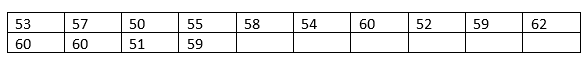
En el nivel de significancia 0,05, puede concluirse que la cantidad media de entrevistas realizadas por los agentes es superior a 53 por semana? Evalúe el valor p.

H0 : mu_muestra_nueva_tecnica <= 53 encuestas
H1 : mu_muestra_nueva_tecnica > 53 encuestas



In [12]:
print("Hipotesis nula H0: promedio con nuevo sistema <= promedio con antiguo sistema")
print("Hipotesis alternativa H1: promedio con nuevo sistema > promedio con antiguo sistema")
print()
mu_Anterior = 53
nivelSignificancia = 1-0.05

numerosEnuestas = [53,57,50,55,58,54,60,52,59,62,60,60,51,59]
encuestasDF = pd.DataFrame({"NroEncuestas": numerosEnuestas})


tamañoMuestra = encuestasDF["NroEncuestas"].count()
muMuestra = encuestasDF["NroEncuestas"].mean()
sigmaMuestra = encuestasDF["NroEncuestas"].std()

tMuestra= (muMuestra-mu_Anterior) / (sigmaMuestra/ (tamañoMuestra**0.5))

gradosLibertad = tamañoMuestra - 1

tSignificancia = t.ppf(nivelSignificancia, gradosLibertad)

if tMuestra > tSignificancia:
    print("2) Como el valor T de la muestra es mayor al T a evaluar, se comprueba la hipotesis H1 y se determina que la media con el nuevo sistema de entrevistas es mayor que el metodo anterior")
    tEstadistico,valorP = ttest_1samp(numerosEnuestas, 53)
    valorP = np.round(valorP,4)
    print()
    print(f"Se tendria que el valor P tiene un valor de {valorP}, como es mucho menor que 0.05, se tendria alta confianza en que el comportamiento promedio del nuevo metodo tiene un valor mas alto que el promedio con el metodo anterior")
    
else:
    print("Como el valor T de la muestra es menor o igual al T a evaluar, se comprueba la hipotesis H0 y se determina que la media con el nuevo sistema de entrevistas es menor que el metodo anterior")

    
    

Hipotesis nula H0: promedio con nuevo sistema <= promedio con antiguo sistema
Hipotesis alternativa H1: promedio con nuevo sistema > promedio con antiguo sistema

2) Como el valor T de la muestra es mayor al T a evaluar, se comprueba la hipotesis H1 y se determina que la media con el nuevo sistema de entrevistas es mayor que el metodo anterior

Se tendria que el valor P tiene un valor de 0.0057, como es mucho menor que 0.05, se tendria alta confianza en que el comportamiento promedio del nuevo metodo tiene un valor mas alto que el promedio con el metodo anterior


### Ejercicio 3
En el último año, se determinó que el tiempo promedio que los estudiantes pasaron resolviendo un examen fue de 65 minutos, con una desviación estándar de 10 minutos. Este año, se seleccionó una muestra aleatoria de 50 estudiantes, y se encontró que el tiempo promedio que tomaron resolviendo el mismo examen fue de 68 minutos.
Considerando que el objetivo es evaluar si hay evidencia suficiente para afirmar que el tiempo promedio ha aumentado este año en comparación con el último, se plantea la siguiente prueba de hipótesis con un nivel de significancia del 5%:

    • Hipótesis nula (H0): El tiempo promedio este año (μ) es igual al tiempo promedio del año pasado (μ0): μ=μ0
    • Hipótesis alternativa (H1): El tiempo promedio este año (μ) es mayor al tiempo promedio del año pasado (μ0): μ>μ0
Se dispone de la desviación estándar poblacional (σ) del año pasado, lo que permite utilizar una prueba Z para la media poblacional.
#### 3.a) Calcule el estadístico de prueba Z utilizando los datos proporcionados.

In [47]:
# poblacional t: minutos
mu_tExamen = 65
sigma_tExamen = 10

# muestral 50 estudiantes
tamañoMuestra = 50
mu_tMuestral = 68
sigma_tMuestral = sigma_tExamen / (tamañoMuestra ** 0.5)

nivelSignificancia = 0.05
# H0: mu_tExamen_AñoActual = mu_tExamen_AñoAnterior
# H0: mu_tExamen_AñoActual > mu_tExamen_AñoAnterior

prueba_Z = np.round((mu_tMuestral - mu_tExamen)/sigma_tMuestral,4)

print(f"3.a) Se tendria que el estadistico de prueba z es {prueba_Z}")


3.a) Se tendria que el estadistico de prueba z es 2.1213


#### 3.b) ¿Qué conclusión se puede obtener con respecto a las hipótesis nula y alternativa basándose en el valor calculado de Z y el valor crítico correspondiente para un nivel de significancia del 5%?

In [57]:
tSignificancia = -t.ppf(nivelSignificancia, tamañoMuestra-1)

tSignificancia

if prueba_Z > tSignificancia:
    print("3.b) Como el valor Z de la muestra es mayor al valor critico de significancia, se comprueba la hipotesis H1 por lo que el tiempo de examen de este año es mayor al del año anterior")


3.b) Como el valor Z de la muestra es mayor al valor critico de significancia, se comprueba la hipotesis H1 por lo que el tiempo de examen de este año es mayor al del año anterior
